# Library Importing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn import preprocessing

In [2]:
cd C:\Users\Meetings\OneDrive - Αριστοτέλειο Πανεπιστήμιο Θεσσαλονίκης\Ερευνητικά\MsC\Προχωρημένα Θέματα Μηχανικής\Group Project\Dataset 1

C:\Users\Meetings\OneDrive - Αριστοτέλειο Πανεπιστήμιο Θεσσαλονίκης\Ερευνητικά\MsC\Προχωρημένα Θέματα Μηχανικής\Group Project\Dataset 1


In [3]:
#main dataset, current loans
application_train= pd.read_csv("application_train.csv")
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
total_missing = application_train.isnull().sum().sum()

# Calculate the total number of values
total_values = application_train.size

# Calculate the percentage of missing values
percentage_missing = (total_missing / total_values) * 100

print(f"The percentage of missing values in the dataset is: {percentage_missing:.2f}%")

The percentage of missing values in the dataset is: 24.40%


In [5]:
continuous_columns = list(application_train.select_dtypes(include=['float64', 'int64']).columns)
continuous_train = application_train[continuous_columns]
continuous_train.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      24700.5         351000.0                    0.018801       -9461   
1      35698.5        1129500.0                    0.003541      -16765   
2       6750.0         135000.0                    0.010032      -19046   
3      29686.5         297000.0                    0.008019      -19005   
4      21865.5         513000.0                    0.028663      -19932   

   DAYS_EMPLOYED  ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
0           -637  ...                 0                 0                 0   
1          -1188  ...                 0                 0                 0   
2           -225  ...                 0                 0                 0   
3          -3039  ...                 0                 0                 0   
4          -3038  ...                 0                 0                 0   

   FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                 0                         0.0                        0.0   
1                 0                         0.0                        0.0   
2                 0                         0.0                        0.0   
3                 0                         NaN                        NaN   
4                 0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 106 columns]

In [6]:
from sklearn.impute import KNNImputer

# Iterate over each column in the DataFrame
for column in continuous_train.columns:
    # Check if the column has missing values
    if continuous_train[column].isnull().sum() > 0:
        # Fill missing values with the mean or median
        if continuous_train[column].dtype == 'float64':
            continuous_train[column].fillna(continuous_train[column].mean(), inplace=True)
        else:
            continuous_train[column].fillna(continuous_train[column].median(), inplace=True)
continuous_train.head()

C:\Users\Meetings\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      24700.5         351000.0                    0.018801       -9461   
1      35698.5        1129500.0                    0.003541      -16765   
2       6750.0         135000.0                    0.010032      -19046   
3      29686.5         297000.0                    0.008019      -19005   
4      21865.5         513000.0                    0.028663      -19932   

   DAYS_EMPLOYED  ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
0           -637  ...                 0                 0                 0   
1          -1188  ...                 0                 0                 0   
2           -225  ...                 0                 0                 0   
3          -3039  ...                 0                 0                 0   
4          -3038  ...                 0                 0                 0   

   FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                 0                    0.000000                      0.000   
1                 0                    0.000000                      0.000   
2                 0                    0.000000                      0.000   
3                 0                    0.006402                      0.007   
4                 0                    0.000000                      0.000   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                    0.000000                   0.000000   
1                    0.000000                   0.000000   
2                    0.000000                   0.000000   
3                    0.034362                   0.267395   
4                    0.000000                   0.000000   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                   0.000000                    1.000000  
1                   0.000000                    0.000000  
2                   0.000000                    0.000000  
3                   0.265474                    1.899974  
4                   0.000000                    0.000000  

[5 rows x 106 columns]

In [7]:
# Selecting categorical variables
categorical_columns = list(application_train.select_dtypes(include=['object', 'category']).columns)
categorical_train = application_train[categorical_columns]
categorical_train.head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE  \
0         Cash loans           M            N               Y   Unaccompanied   
1         Cash loans           F            N               N          Family   
2    Revolving loans           M            Y               Y   Unaccompanied   
3         Cash loans           F            N               Y   Unaccompanied   
4         Cash loans           M            N               Y   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0  House / apartment        Laborers                  WEDNESDAY   
1  House / apartment      Core staff                     MONDAY   
2  House / apartment        Laborers                     MONDAY   
3  House / apartment        Laborers                  WEDNESDAY   
4  House / apartment      Core staff                   THURSDAY   

        ORGANIZATION_TYPE FONDKAPREMONT_MODE  HOUSETYPE_MODE  \
0  Business Entity Type 3   reg oper account  block of flats   
1                  School   reg oper account  block of flats   
2              Government                NaN             NaN   
3  Business Entity Type 3                NaN             NaN   
4                Religion                NaN             NaN   

  WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
0       Stone, brick                  No  
1              Block                  No  
2                NaN                 NaN  
3                NaN                 NaN  
4                NaN                 NaN

In [8]:
# Iterate over each column in the DataFrame
for column in categorical_train.columns:
    # Check if the column has missing values
    if categorical_train[column].isnull().sum() > 0:
        # Fill missing values with the mode
        categorical_train[column].fillna(categorical_train[column].mode()[0], inplace=True)
categorical_train.head()

C:\Users\Meetings\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE  \
0         Cash loans           M            N               Y   Unaccompanied   
1         Cash loans           F            N               N          Family   
2    Revolving loans           M            Y               Y   Unaccompanied   
3         Cash loans           F            N               Y   Unaccompanied   
4         Cash loans           M            N               Y   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0  House / apartment        Laborers                  WEDNESDAY   
1  House / apartment      Core staff                     MONDAY   
2  House / apartment        Laborers                     MONDAY   
3  House / apartment        Laborers                  WEDNESDAY   
4  House / apartment      Core staff                   THURSDAY   

        ORGANIZATION_TYPE FONDKAPREMONT_MODE  HOUSETYPE_MODE  \
0  Business Entity Type 3   reg oper account  block of flats   
1                  School   reg oper account  block of flats   
2              Government   reg oper account  block of flats   
3  Business Entity Type 3   reg oper account  block of flats   
4                Religion   reg oper account  block of flats   

  WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
0       Stone, brick                  No  
1              Block                  No  
2              Panel                  No  
3              Panel                  No  
4              Panel                  No

In [9]:
application_train = pd.concat([categorical_train,continuous_train], axis=1)

In [10]:
total_missing = application_train.isnull().sum().sum()

# Calculate the total number of values
total_values = application_train.size

# Calculate the percentage of missing values
percentage_missing = (total_missing / total_values) * 100

print(f"The percentage of missing values in the dataset is: {percentage_missing:.2f}%")

The percentage of missing values in the dataset is: 0.00%


In [11]:
application_train.shape

(307511, 122)

In [12]:
# feature engineering adding 2 new features'percentage of credit to annual income' and "percentage of loan annuity to income"
application_train['percentage_of_credit_to_income'] = (application_train['AMT_CREDIT'] / application_train['AMT_INCOME_TOTAL'])*100
application_train['percentage_of_annuity_to_income'] = (application_train['AMT_ANNUITY'] / application_train['AMT_INCOME_TOTAL'])*100
application_train.head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE  \
0         Cash loans           M            N               Y   Unaccompanied   
1         Cash loans           F            N               N          Family   
2    Revolving loans           M            Y               Y   Unaccompanied   
3         Cash loans           F            N               Y   Unaccompanied   
4         Cash loans           M            N               Y   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE OCCUPATION_TYPE  ... FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  House / apartment        Laborers  ...                0                0   
1  House / apartment      Core staff  ...                0                0   
2  House / apartment        Laborers  ...                0                0   
3  House / apartment        Laborers  ...                0                0   
4  House / apartment      Core staff  ...                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                   0.000000                     0.000   
1                   0.000000                     0.000   
2                   0.000000                     0.000   
3                   0.006402                     0.007   
4                   0.000000                     0.000   

  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                   0.000000                  0.000000   
1                   0.000000                  0.000000   
2                   0.000000                  0.000000   
3                   0.034362                  0.267395   
4                   0.000000                  0.000000   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0                   0.000000                    1.000000   
1                   0.000000                    0.000000   
2                   0.000000                    0.000000   
3                   0.265474                    1.899974   
4                   0.000000                    0.000000   

   percentage_of_credit_to_income  percentage_of_annuity_to_income  
0                      200.788889                        12.197778  
1                      479.075000                        13.221667  
2                      200.000000                        10.000000  
3                      231.616667                        21.990000  
4                      422.222222                        17.996296  

[5 rows x 124 columns]

In [13]:
application_train.shape

(307511, 124)

# Importing of the second dataset

In [14]:
#loans from other institutions
bureau=pd.read_csv("bureau.csv")
bureau = bureau.sort_values(by='SK_ID_CURR', ascending=True)
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
248487      100001       5896633        Closed      currency 1        -1572   
248485      100001       5896631        Closed      currency 1         -909   
248490      100001       5896636        Active      currency 1         -320   
248489      100001       5896635        Active      currency 1          -49   
248486      100001       5896632        Closed      currency 1         -879   

        CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
248487                   0              -1329.0            -1328.0   
248485                   0               -179.0             -877.0   
248490                   0                411.0                NaN   
248489                   0               1778.0                NaN   
248486                   0               -514.0             -544.0   

        AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
248487                     NaN                   0         85500.0   
248485                     NaN                   0        279720.0   
248490                     NaN                   0        168345.0   
248489                     NaN                   0        378000.0   
248486                     NaN                   0         91620.0   

        AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
248487                  0.0                   0.0                     0.0   
248485                  0.0                   0.0                     0.0   
248490             110281.5                   NaN                     0.0   
248489             373239.0                   0.0                     0.0   
248486                  0.0                   0.0                     0.0   

            CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
248487  Consumer credit                -155          0.0  
248485  Consumer credit                -155          0.0  
248490  Consumer credit                 -10       9364.5  
248489  Consumer credit                 -16      10822.5  
248486  Consumer credit                -155          0.0

In [15]:
bureau.shape

(1716428, 17)

In [16]:
#checking the different values credit_active can take
unique_values = bureau['CREDIT_ACTIVE'].unique()
print(unique_values)

['Closed' 'Active' 'Sold' 'Bad debt']


In [17]:
# Create a new DataFrame to store the counts
counts_df = pd.DataFrame(index=bureau["SK_ID_CURR"].unique())

# Loop through each status and count the number of loans for each customer
for status in bureau["CREDIT_ACTIVE"].unique():
    # Count the number of loans for each customer with the current status
    counts = bureau[bureau["CREDIT_ACTIVE"] == status].groupby("SK_ID_CURR").size()
    
    # Add the counts as a new column in the counts_df DataFrame
    counts_df[status] = counts
    
# Fill any missing values with zeros
counts_df.fillna(0, inplace=True)
#create a new column using the indexes
counts_df = counts_df.reset_index().rename(columns={'index': 'SK_ID_CURR'})

In [18]:
counts_df.head()

SK_ID_CURR  Closed  Active  Sold  Bad debt
0      100001     4.0     3.0   0.0       0.0
1      100002     6.0     2.0   0.0       0.0
2      100003     3.0     1.0   0.0       0.0
3      100004     2.0     0.0   0.0       0.0
4      100005     1.0     2.0   0.0       0.0

In [19]:
counts_df.shape

(305811, 5)

In [20]:
# Calculate the maximum days of delay for each customer
max_delays = bureau.groupby("SK_ID_CURR")["CREDIT_DAY_OVERDUE"].max()

# Create a new DataFrame to store the maximum delays
max_delays_df = pd.DataFrame({"SK_ID_CURR": max_delays.index, "max_days_delayed": max_delays.values})
max_delays_df.head()

SK_ID_CURR  max_days_delayed
0      100001                 0
1      100002                 0
2      100003                 0
3      100004                 0
4      100005                 0

In [21]:
# Calculate the maximum amount of money delayed for each customer
max_amount = bureau.groupby("SK_ID_CURR")["AMT_CREDIT_SUM_OVERDUE"].max()

# Create a new DataFrame to store the maximum delays
max_amount_df = pd.DataFrame({"SK_ID_CURR": max_amount.index, "max_amount_delayed": max_amount.values})
max_amount_df.head()

SK_ID_CURR  max_amount_delayed
0      100001                 0.0
1      100002                 0.0
2      100003                 0.0
3      100004                 0.0
4      100005                 0.0

In [22]:
merged_bureau = pd.merge(counts_df, max_delays_df, on="SK_ID_CURR").merge(max_amount_df, on="SK_ID_CURR")
merged_bureau.head()

SK_ID_CURR  Closed  Active  Sold  Bad debt  max_days_delayed  \
0      100001     4.0     3.0   0.0       0.0                 0   
1      100002     6.0     2.0   0.0       0.0                 0   
2      100003     3.0     1.0   0.0       0.0                 0   
3      100004     2.0     0.0   0.0       0.0                 0   
4      100005     1.0     2.0   0.0       0.0                 0   

   max_amount_delayed  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [23]:
merged_bureau.shape

(305811, 7)

In [24]:
#find common customers between the main dataframe and the bureau dataframe
common_elements_bureau = set(application_train['SK_ID_CURR']).intersection(set(merged_bureau['SK_ID_CURR']))

In [25]:
#using common_elements as mask we keep only the customers with previous applications that have an active loan
merged_bureau_filtered = merged_bureau[merged_bureau['SK_ID_CURR'].isin(common_elements_bureau)]
merged_bureau_filtered = merged_bureau_filtered.sort_values(by='SK_ID_CURR', ascending=True)
merged_bureau_filtered.head()

SK_ID_CURR  Closed  Active  Sold  Bad debt  max_days_delayed  \
1      100002     6.0     2.0   0.0       0.0                 0   
2      100003     3.0     1.0   0.0       0.0                 0   
3      100004     2.0     0.0   0.0       0.0                 0   
5      100007     1.0     0.0   0.0       0.0                 0   
6      100008     2.0     1.0   0.0       0.0                 0   

   max_amount_delayed  
1                 0.0  
2                 0.0  
3                 0.0  
5                 0.0  
6                 0.0

In [26]:
merged_bureau_filtered.shape

(263491, 7)

In [27]:
# merge bureau dataframe with the main 
first_main_merge = pd.merge(merged_bureau_filtered, application_train, on='SK_ID_CURR')
first_main_merge.fillna(0, inplace=True)
first_main_merge.head()

SK_ID_CURR  Closed  Active  Sold  Bad debt  max_days_delayed  \
0      100002     6.0     2.0   0.0       0.0                 0   
1      100003     3.0     1.0   0.0       0.0                 0   
2      100004     2.0     0.0   0.0       0.0                 0   
3      100007     1.0     0.0   0.0       0.0                 0   
4      100008     2.0     1.0   0.0       0.0                 0   

   max_amount_delayed NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  ...  \
0                 0.0         Cash loans           M            N  ...   
1                 0.0         Cash loans           F            N  ...   
2                 0.0    Revolving loans           M            Y  ...   
3                 0.0         Cash loans           M            N  ...   
4                 0.0         Cash loans           M            N  ...   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        0.0   
4                0                0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       1.0   

  AMT_REQ_CREDIT_BUREAU_YEAR percentage_of_credit_to_income  \
0                        1.0                     200.788889   
1                        0.0                     479.075000   
2                        0.0                     200.000000   
3                        0.0                     422.222222   
4                        1.0                     495.450000   

  percentage_of_annuity_to_income  
0                       12.197778  
1                       13.221667  
2                       10.000000  
3                       17.996296  
4                       27.795455  

[5 rows x 130 columns]

In [28]:
first_main_merge.shape

(263491, 130)

# Importing of third Dataset

In [29]:
POS_CASH_balance=pd.read_csv("POS_CASH_balance.csv")
POS_CASH_balance = POS_CASH_balance.sort_values(by='SK_ID_CURR', ascending=True)
POS_CASH_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
8531326     1851984      100001             -94             4.0   
1891462     1851984      100001             -95             4.0   
8789081     1369693      100001             -56             4.0   
4704415     1369693      100001             -54             4.0   
7167007     1369693      100001             -57             4.0   

         CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
8531326                    0.0               Active       0           0  
1891462                    1.0               Active       7           7  
8789081                    3.0               Active       0           0  
4704415                    1.0               Active       0           0  
7167007                    4.0               Active       0           0

In [30]:
POS_CASH_balance.shape

(10001358, 8)

In [31]:
#checking the different values NAME_CONTRACT_STATUS can take
unique_values = POS_CASH_balance['NAME_CONTRACT_STATUS'].unique()
print(unique_values)

['Active' 'Completed' 'Signed' 'Returned to the store' 'Approved' 'Demand'
 'Amortized debt' 'Canceled' 'XNA']


In [32]:
# Create a new DataFrame with one row for each unique SK_ID_CURR
POS_CASH = pd.DataFrame(POS_CASH_balance['SK_ID_CURR'].unique(), columns=['SK_ID_CURR'])

# Add columns for the count of SK_DPD_DEF values larger than zero and the maximum value of SK_DPD_DEF
POS_CASH['SK_DPD_DEF_count'] = POS_CASH_balance[POS_CASH_balance['SK_DPD_DEF'] > 0].groupby('SK_ID_CURR')['SK_DPD_DEF'].count()
POS_CASH['SK_DPD_DEF_max'] = POS_CASH_balance.groupby('SK_ID_CURR')['SK_DPD_DEF'].max()

# Fill missing values with 0 (in case there are no values larger than zero for a specific SK_ID_CURR)
POS_CASH['SK_DPD_DEF_count'].fillna(0, inplace=True)

# Fill missing values with 0 (in case there are no values for a specific SK_ID_CURR)
POS_CASH['SK_DPD_DEF_max'].fillna(0, inplace=True)

In [33]:
POS_CASH.head()

SK_ID_CURR  SK_DPD_DEF_count  SK_DPD_DEF_max
0      100001               0.0             0.0
1      100002               0.0             0.0
2      100003               0.0             0.0
3      100004               0.0             0.0
4      100005               0.0             0.0

In [34]:
#find common customers between the main dataframe and the POS_CASH_balance dataframe
common_elements_POS_CASH = set(application_train['SK_ID_CURR']).intersection(set(POS_CASH['SK_ID_CURR']))

In [35]:
#using common_elements_POS_CASH as mask we keep only the customers who have an active loan
POS_CASH_filtered = POS_CASH[POS_CASH['SK_ID_CURR'].isin(common_elements_POS_CASH)]
POS_CASH_filtered = POS_CASH_filtered.sort_values(by='SK_ID_CURR', ascending=True)
POS_CASH_filtered.head()

SK_ID_CURR  SK_DPD_DEF_count  SK_DPD_DEF_max
1      100002               0.0             0.0
2      100003               0.0             0.0
3      100004               0.0             0.0
5      100006               0.0             0.0
6      100007               0.0             0.0

In [36]:
POS_CASH_filtered.shape

(289444, 3)

In [37]:
# merge POS_CASH dataframe with the first merge
second_main_merge = pd.merge(POS_CASH_filtered, first_main_merge, on='SK_ID_CURR')
second_main_merge.fillna(0, inplace=True)
second_main_merge.head()

SK_ID_CURR  SK_DPD_DEF_count  SK_DPD_DEF_max  Closed  Active  Sold  \
0      100002               0.0             0.0     6.0     2.0   0.0   
1      100003               0.0             0.0     3.0     1.0   0.0   
2      100004               0.0             0.0     2.0     0.0   0.0   
3      100007               0.0             0.0     1.0     0.0   0.0   
4      100008               0.0             0.0     2.0     1.0   0.0   

   Bad debt  max_days_delayed  max_amount_delayed NAME_CONTRACT_TYPE  ...  \
0       0.0                 0                 0.0         Cash loans  ...   
1       0.0                 0                 0.0         Cash loans  ...   
2       0.0                 0                 0.0    Revolving loans  ...   
3       0.0                 0                 0.0         Cash loans  ...   
4       0.0                 0                 0.0         Cash loans  ...   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        0.0   
4                0                0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       1.0   

  AMT_REQ_CREDIT_BUREAU_YEAR percentage_of_credit_to_income  \
0                        1.0                     200.788889   
1                        0.0                     479.075000   
2                        0.0                     200.000000   
3                        0.0                     422.222222   
4                        1.0                     495.450000   

  percentage_of_annuity_to_income  
0                       12.197778  
1                       13.221667  
2                       10.000000  
3                       17.996296  
4                       27.795455  

[5 rows x 132 columns]

In [38]:
second_main_merge.shape

(248229, 132)

# Importing of Fourth Dataset

In [39]:
previous_application=pd.read_csv("previous_application.csv")
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [40]:
previous_application_sorted = previous_application.sort_values(by='SK_ID_CURR', ascending=True)

In [41]:
previous_application_sorted.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
201668      1369693      100001     Consumer loans     3951.000   
892077      1038818      100002     Consumer loans     9251.775   
575941      1810518      100003         Cash loans    98356.995   
1021650     2636178      100003     Consumer loans    64567.665   
1223745     2396755      100003     Consumer loans     6737.310   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
201668           24835.5     23787.0            2520.0          24835.5   
892077          179055.0    179055.0               0.0         179055.0   
575941          900000.0   1035882.0               NaN         900000.0   
1021650         337500.0    348637.5               0.0         337500.0   
1223745          68809.5     68053.5            6885.0          68809.5   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  ...  \
201668                      FRIDAY                       13  ...   
892077                    SATURDAY                        9  ...   
575941                      FRIDAY                       12  ...   
1021650                     SUNDAY                       17  ...   
1223745                   SATURDAY                       15  ...   

         NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
201668           Connectivity          8.0              high   
892077        Auto technology         24.0        low_normal   
575941                    XNA         12.0        low_normal   
1021650             Furniture          6.0            middle   
1223745  Consumer electronics         12.0            middle   

                 PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
201668      POS mobile with interest            365243.0        -1709.0   
892077       POS other with interest            365243.0         -565.0   
575941              Cash X-Sell: low            365243.0         -716.0   
1021650   POS industry with interest            365243.0         -797.0   
1223745  POS household with interest            365243.0        -2310.0   

        DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
201668                    -1499.0        -1619.0          -1612.0   
892077                      125.0          -25.0            -17.0   
575941                     -386.0         -536.0           -527.0   
1021650                    -647.0         -647.0           -639.0   
1223745                   -1980.0        -1980.0          -1976.0   

        NFLAG_INSURED_ON_APPROVAL  
201668                        0.0  
892077                        0.0  
575941                        1.0  
1021650                       0.0  
1223745                       1.0  

[5 rows x 37 columns]

In [42]:
previous_application.shape

(1670214, 37)

In [43]:
# count the number of times each customer ID appears
customer_counts = previous_application['SK_ID_CURR'].value_counts().reset_index()

# rename the columns
customer_counts = customer_counts.rename(columns={'index': 'SK_ID_CURR', 'SK_ID_CURR': 'nummber_of_applications'})

# sort the dataframe by the 'SK_ID_CURR' column in ascending order
customer_counts = customer_counts.sort_values(by='SK_ID_CURR', ascending=True)

# print the resulting dataframe
customer_counts.head()

SK_ID_CURR  nummber_of_applications
306566      100001                        1
322218      100002                        1
187164      100003                        3
329777      100004                        1
228956      100005                        2

In [44]:
#checking the different values NAME_CONTRACT_STATUS can take
unique_values = previous_application['NAME_CONTRACT_TYPE'].unique()
print(unique_values)

['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']


In [45]:
# Create a new DataFrame to store the counts
counts_df = pd.DataFrame(index=bureau["SK_ID_CURR"].unique())

# Loop through each status and count the number of loans for each customer
for status in previous_application["NAME_CONTRACT_TYPE"].unique():
    # Count the number of loans for each customer with the current status
    counts = previous_application[previous_application["NAME_CONTRACT_TYPE"] == status].groupby("SK_ID_CURR").size()
    
    # Add the counts as a new column in the counts_df DataFrame
    counts_df[status] = counts
    
# Fill any missing values with zeros
counts_df.fillna(0, inplace=True)
#create a new column using the indexes
counts_df = counts_df.reset_index().rename(columns={'index': 'SK_ID_CURR'})
counts_df.head()

SK_ID_CURR  Consumer loans  Cash loans  Revolving loans  XNA
0      100001             1.0         0.0              0.0  0.0
1      100002             1.0         0.0              0.0  0.0
2      100003             2.0         1.0              0.0  0.0
3      100004             1.0         0.0              0.0  0.0
4      100005             1.0         1.0              0.0  0.0

In [46]:
#checking the different values NAME_CONTRACT_STATUS can take
unique_values = previous_application['NAME_CONTRACT_STATUS'].unique()
print(unique_values)

['Approved' 'Refused' 'Canceled' 'Unused offer']


In [47]:
# Create a new DataFrame to store the counts
counts_df_2 = pd.DataFrame(index=bureau["SK_ID_CURR"].unique())

# Loop through each status and count the number of contract status for each customer
for status in previous_application["NAME_CONTRACT_STATUS"].unique():
    # Count the number of loans for each customer with the current status
    counts_2 = previous_application[previous_application["NAME_CONTRACT_STATUS"] == status].groupby("SK_ID_CURR").size()
    
    # Add the counts as a new column in the counts_df DataFrame
    counts_df_2[status] = counts_2
    
# Fill any missing values with zeros
counts_df_2.fillna(0, inplace=True)
#create a new column using the indexes
counts_df_2 = counts_df_2.reset_index().rename(columns={'index': 'SK_ID_CURR'})
counts_df_2.head()

SK_ID_CURR  Approved  Refused  Canceled  Unused offer
0      100001       1.0      0.0       0.0           0.0
1      100002       1.0      0.0       0.0           0.0
2      100003       3.0      0.0       0.0           0.0
3      100004       1.0      0.0       0.0           0.0
4      100005       1.0      0.0       1.0           0.0

In [48]:
merged_1_previous_application = pd.merge(customer_counts,counts_df, on="SK_ID_CURR").merge(counts_df_2,on="SK_ID_CURR" )
merged_1_previous_application.head()

SK_ID_CURR  nummber_of_applications  Consumer loans  Cash loans  \
0      100001                        1             1.0         0.0   
1      100002                        1             1.0         0.0   
2      100003                        3             2.0         1.0   
3      100004                        1             1.0         0.0   
4      100005                        2             1.0         1.0   

   Revolving loans  XNA  Approved  Refused  Canceled  Unused offer  
0              0.0  0.0       1.0      0.0       0.0           0.0  
1              0.0  0.0       1.0      0.0       0.0           0.0  
2              0.0  0.0       3.0      0.0       0.0           0.0  
3              0.0  0.0       1.0      0.0       0.0           0.0  
4              0.0  0.0       1.0      0.0       1.0           0.0

In [49]:
# feature engineering adding 2 new features'days of delays of previous applications' and "annuity to final credit percentage"
previous_application['days of delays'] = (previous_application['DAYS_LAST_DUE'] - previous_application['DAYS_TERMINATION'])
previous_application['percentage_of_annuity_to_credit'] = (previous_application['AMT_ANNUITY'] / previous_application['AMT_CREDIT'])*100
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_YIELD_GROUP       PRODUCT_COMBINATION  \
0                       15  ...           middle  POS mobile with interest   
1                       11  ...       low_action          Cash X-Sell: low   
2                       11  ...             high         Cash X-Sell: high   
3                        7  ...           middle       Cash X-Sell: middle   
4                        9  ...             high         Cash Street: high   

   DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
0            365243.0           -42.0                      300.0   
1            365243.0          -134.0                      916.0   
2            365243.0          -271.0                       59.0   
3            365243.0          -482.0                     -152.0   
4                 NaN             NaN                        NaN   

  DAYS_LAST_DUE DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL days of delays  \
0         -42.0            -37.0                        0.0           -5.0   
1      365243.0         365243.0                        1.0            0.0   
2      365243.0         365243.0                        1.0            0.0   
3        -182.0           -177.0                        1.0           -5.0   
4           NaN              NaN                        NaN            NaN   

  percentage_of_annuity_to_credit  
0                       10.092913  
1                        3.706001  
2                       11.037993  
3                        9.992000  
4                        7.901002  

[5 rows x 39 columns]

In [50]:
# Calculate the maximum amount of money delayed for each customer
max_previous_delay_days = previous_application.groupby("SK_ID_CURR")["days of delays"].max()

# Create a new DataFrame to store the maximum delays
max_previous_delay_days_df = pd.DataFrame({"SK_ID_CURR": max_previous_delay_days.index, "max_previous_delayed_days": max_previous_delay_days.values})
max_previous_delay_days_df.head()

SK_ID_CURR  max_previous_delayed_days
0      100001                       -7.0
1      100002                       -8.0
2      100003                       -4.0
3      100004                      -10.0
4      100005                       -6.0

In [51]:
# Calculate the maximum amount of percentage of anuity to credit on previous applicationsfor each customer
max_percentage_of_annuity_to_credit = previous_application.groupby("SK_ID_CURR")["percentage_of_annuity_to_credit"].max()

# Create a new DataFrame to store the maximum percentage of anuity to credit on previous applications
max_percentage_of_annuity_to_credit_df = pd.DataFrame({"SK_ID_CURR": max_percentage_of_annuity_to_credit.index, "max_previous_anuity_to_credit": max_percentage_of_annuity_to_credit.values})
max_percentage_of_annuity_to_credit_df.head()

SK_ID_CURR  max_previous_anuity_to_credit
0      100001                      16.609913
1      100002                       5.167002
2      100003                      18.520000
3      100004                      26.645031
4      100005                      11.987000

In [52]:
merged_2_previous_application = pd.merge(max_previous_delay_days_df,max_percentage_of_annuity_to_credit_df, on="SK_ID_CURR")
merged_2_previous_application.head()

SK_ID_CURR  max_previous_delayed_days  max_previous_anuity_to_credit
0      100001                       -7.0                      16.609913
1      100002                       -8.0                       5.167002
2      100003                       -4.0                      18.520000
3      100004                      -10.0                      26.645031
4      100005                       -6.0                      11.987000

In [53]:
merged_previous_application = pd.merge(merged_1_previous_application,merged_2_previous_application, on="SK_ID_CURR")
merged_previous_application.head()

SK_ID_CURR  nummber_of_applications  Consumer loans  Cash loans  \
0      100001                        1             1.0         0.0   
1      100002                        1             1.0         0.0   
2      100003                        3             2.0         1.0   
3      100004                        1             1.0         0.0   
4      100005                        2             1.0         1.0   

   Revolving loans  XNA  Approved  Refused  Canceled  Unused offer  \
0              0.0  0.0       1.0      0.0       0.0           0.0   
1              0.0  0.0       1.0      0.0       0.0           0.0   
2              0.0  0.0       3.0      0.0       0.0           0.0   
3              0.0  0.0       1.0      0.0       0.0           0.0   
4              0.0  0.0       1.0      0.0       1.0           0.0   

   max_previous_delayed_days  max_previous_anuity_to_credit  
0                       -7.0                      16.609913  
1                       -8.0                       5.167002  
2                       -4.0                      18.520000  
3                      -10.0                      26.645031  
4                       -6.0                      11.987000

In [54]:
#find common customers between the main dataframe and the previous_application dataframe
common_elements_previous_application= set(application_train['SK_ID_CURR']).intersection(set(merged_previous_application['SK_ID_CURR']))

In [55]:
#using common_elements_POS_CASH as mask we keep only the customers who have an active loan
merged_previous_application_filtered = merged_previous_application[merged_previous_application['SK_ID_CURR'].isin(common_elements_previous_application)]
merged_previous_application_filtered = merged_previous_application_filtered.sort_values(by='SK_ID_CURR', ascending=True)
merged_previous_application_filtered.head()

SK_ID_CURR  nummber_of_applications  Consumer loans  Cash loans  \
1      100002                        1             1.0         0.0   
2      100003                        3             2.0         1.0   
3      100004                        1             1.0         0.0   
5      100007                        6             2.0         4.0   
6      100008                        5             3.0         2.0   

   Revolving loans  XNA  Approved  Refused  Canceled  Unused offer  \
1              0.0  0.0       1.0      0.0       0.0           0.0   
2              0.0  0.0       3.0      0.0       0.0           0.0   
3              0.0  0.0       1.0      0.0       0.0           0.0   
5              0.0  0.0       6.0      0.0       0.0           0.0   
6              0.0  0.0       4.0      0.0       1.0           0.0   

   max_previous_delayed_days  max_previous_anuity_to_credit  
1                       -8.0                       5.167002  
2                       -4.0                      18.520000  
3                      -10.0                      26.645031  
5                        0.0                      12.549877  
6                       -3.0                      20.070053

In [56]:
# merge previous_application dataframe with the second merge
third_main_merge = pd.merge(merged_previous_application_filtered , second_main_merge, on='SK_ID_CURR')
third_main_merge.fillna(0, inplace=True)
third_main_merge.head()

SK_ID_CURR  nummber_of_applications  Consumer loans  Cash loans  \
0      100002                        1             1.0         0.0   
1      100003                        3             2.0         1.0   
2      100004                        1             1.0         0.0   
3      100007                        6             2.0         4.0   
4      100008                        5             3.0         2.0   

   Revolving loans  XNA  Approved  Refused  Canceled  Unused offer  ...  \
0              0.0  0.0       1.0      0.0       0.0           0.0  ...   
1              0.0  0.0       3.0      0.0       0.0           0.0  ...   
2              0.0  0.0       1.0      0.0       0.0           0.0  ...   
3              0.0  0.0       6.0      0.0       0.0           0.0  ...   
4              0.0  0.0       4.0      0.0       1.0           0.0  ...   

   FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                 0                 0                         0.0   
1                 0                 0                         0.0   
2                 0                 0                         0.0   
3                 0                 0                         0.0   
4                 0                 0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        1.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  percentage_of_credit_to_income  \
0                         1.0                      200.788889   
1                         0.0                      479.075000   
2                         0.0                      200.000000   
3                         0.0                      422.222222   
4                         1.0                      495.450000   

   percentage_of_annuity_to_income  
0                        12.197778  
1                        13.221667  
2                        10.000000  
3                        17.996296  
4                        27.795455  

[5 rows x 143 columns]

In [57]:
third_main_merge.shape

(247244, 143)

# Importing of fifth dataset

In [58]:
installments_payments=pd.read_csv("installments_payments.csv")
installments_payments.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

In [59]:
installments_payments.shape

(13605401, 8)

In [60]:
# adding a 2 new features'differene of expected to actual payment" and "percentage of payment to expected payment
installments_payments['day_to_actual_payment'] = (installments_payments['DAYS_INSTALMENT'] - installments_payments['DAYS_ENTRY_PAYMENT'])
installments_payments['percentage_payment_to_expected'] = ((installments_payments['AMT_PAYMENT'] / installments_payments['AMT_INSTALMENT']))*100
installments_payments = installments_payments.sort_values(by='SK_ID_CURR', ascending=True)
installments_payments.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
3458712     1369693      100001                     1.0   
3435373     1851984      100001                     1.0   
2624024     1369693      100001                     2.0   
1761012     1851984      100001                     1.0   
3774071     1851984      100001                     1.0   

         NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
3458712                      3          -1649.0             -1660.0   
3435373                      4          -2856.0             -2856.0   
2624024                      4          -1619.0             -1628.0   
1761012                      2          -2916.0             -2916.0   
3774071                      3          -2886.0             -2875.0   

         AMT_INSTALMENT  AMT_PAYMENT  day_to_actual_payment  \
3458712        3951.000     3951.000                   11.0   
3435373        3980.925     3980.925                    0.0   
2624024       17397.900    17397.900                    9.0   
1761012        3982.050     3982.050                    0.0   
3774071        3982.050     3982.050                  -11.0   

         percentage_payment_to_expected  
3458712                           100.0  
3435373                           100.0  
2624024                           100.0  
1761012                           100.0  
3774071                           100.0

In [61]:
# Group by SK_ID_CURR and calculate the number of delayed payments
delayed_installments_payments = installments_payments.groupby('SK_ID_CURR')['day_to_actual_payment'].apply(lambda x: (x > 0).sum()).reset_index()

# Rename the columns
delayed_installments_payments.columns = ['SK_ID_CURR', 'day_to_actual_payment_count']

delayed_installments_payments.head()

SK_ID_CURR  day_to_actual_payment_count
0      100001                            4
1      100002                           19
2      100003                           25
3      100004                            3
4      100005                            8

In [62]:
installments_payments.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
3458712     1369693      100001                     1.0   
3435373     1851984      100001                     1.0   
2624024     1369693      100001                     2.0   
1761012     1851984      100001                     1.0   
3774071     1851984      100001                     1.0   

         NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
3458712                      3          -1649.0             -1660.0   
3435373                      4          -2856.0             -2856.0   
2624024                      4          -1619.0             -1628.0   
1761012                      2          -2916.0             -2916.0   
3774071                      3          -2886.0             -2875.0   

         AMT_INSTALMENT  AMT_PAYMENT  day_to_actual_payment  \
3458712        3951.000     3951.000                   11.0   
3435373        3980.925     3980.925                    0.0   
2624024       17397.900    17397.900                    9.0   
1761012        3982.050     3982.050                    0.0   
3774071        3982.050     3982.050                  -11.0   

         percentage_payment_to_expected  
3458712                           100.0  
3435373                           100.0  
2624024                           100.0  
1761012                           100.0  
3774071                           100.0

In [63]:
# Calculate the maximum amount of percentage of anuity to credit on previous applicationsfor each customer
max_days_of_delay = installments_payments.groupby("SK_ID_CURR")["day_to_actual_payment"].max()

# Create a new DataFrame to store the maximum percentage of anuity to credit on previous applications and the number of delayed instalments
max_days_of_delay_df = pd.DataFrame({"SK_ID_CURR": max_days_of_delay.index, "max_days_of_delay": max_days_of_delay.values})
max_days_of_delay_df.head()

SK_ID_CURR  max_days_of_delay
0      100001               36.0
1      100002               31.0
2      100003               14.0
3      100004               11.0
4      100005               37.0

In [64]:
merged_installments_payments = pd.merge(delayed_installments_payments,max_days_of_delay_df, on="SK_ID_CURR")
merged_installments_payments.head()

SK_ID_CURR  day_to_actual_payment_count  max_days_of_delay
0      100001                            4               36.0
1      100002                           19               31.0
2      100003                           25               14.0
3      100004                            3               11.0
4      100005                            8               37.0

In [65]:
#find common customers between the main dataframe and the installments_payment dataframe
common_elements_installments_payments= set(application_train['SK_ID_CURR']).intersection(set(merged_installments_payments['SK_ID_CURR']))

In [66]:
#using common_elements_installments_payments as mask we keep only the customers who are common in both datasets
merged_installments_payments_filtered = merged_installments_payments[merged_installments_payments['SK_ID_CURR'].isin(common_elements_installments_payments)]
merged_installments_payments_filtered = merged_installments_payments_filtered.sort_values(by='SK_ID_CURR', ascending=True)
merged_installments_payments_filtered.head()

SK_ID_CURR  day_to_actual_payment_count  max_days_of_delay
1      100002                           19               31.0
2      100003                           25               14.0
3      100004                            3               11.0
5      100006                           16               77.0
6      100007                           41               31.0

In [67]:
# merge installments_paymentsdataframe with the third merge
fourth_main_merge = pd.merge(merged_installments_payments_filtered , third_main_merge, on='SK_ID_CURR')
fourth_main_merge.fillna(0, inplace=True)
fourth_main_merge.head()

SK_ID_CURR  day_to_actual_payment_count  max_days_of_delay  \
0      100002                           19               31.0   
1      100003                           25               14.0   
2      100004                            3               11.0   
3      100007                           41               31.0   
4      100008                           34               28.0   

   nummber_of_applications  Consumer loans  Cash loans  Revolving loans  XNA  \
0                        1             1.0         0.0              0.0  0.0   
1                        3             2.0         1.0              0.0  0.0   
2                        1             1.0         0.0              0.0  0.0   
3                        6             2.0         4.0              0.0  0.0   
4                        5             3.0         2.0              0.0  0.0   

   Approved  Refused  ...  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0       1.0      0.0  ...                 0                 0   
1       3.0      0.0  ...                 0                 0   
2       1.0      0.0  ...                 0                 0   
3       6.0      0.0  ...                 0                 0   
4       4.0      0.0  ...                 0                 0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0                        0.0                         1.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        1.0                         1.0   

   percentage_of_credit_to_income  percentage_of_annuity_to_income  
0                      200.788889                        12.197778  
1                      479.075000                        13.221667  
2                      200.000000                        10.000000  
3                      422.222222                        17.996296  
4                      495.450000                        27.795455  

[5 rows x 145 columns]

In [68]:
fourth_main_merge.shape

(247032, 145)

# Importing of sixth dataset

In [22]:
bureau_balance=pd.read_csv("bureau_balance.csv")
bureau_balance = bureau_balance.sort_values(by='SK_ID_BUREAU', ascending=True)
bureau_balance.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
26079760       5001709              -7      C
26079756       5001709              -3      C
26079757       5001709              -4      C
26079758       5001709              -5      C
26079759       5001709              -6      C

In [23]:
bureau_balance.shape

(27299925, 3)

In [24]:
#checking the different values status can take
unique_values = bureau_balance['STATUS'].unique()
print(unique_values)

['C' 'X' '0' '1' '5' '4' '3' '2']


In [25]:
bureau_balance['STATUS'] = bureau_balance['STATUS'].replace('X', '0')
bureau_balance['STATUS'] = bureau_balance['STATUS'].replace('C', '0')
unique_values = bureau_balance['STATUS'].unique()
print(unique_values)

['0' '1' '5' '4' '3' '2']


The SK_ID_CURR is not presented in this dataset, only the SK_ID_BUREAU is used. But both SK_ID_CURR and SK_ID_BUREAU in the bureau dataset. So using the corresponding SK_ID_CURR of each SK_ID_BUREAU in the bureau dataset we will introduce the SK_ID_CURR to the bureau_balance dataset.

In [26]:
#drop dublicates of SK_ID_BUREAU in both bureau datasets.
no_dublicates_bureau_balance = bureau_balance.drop_duplicates(subset=['SK_ID_BUREAU'])
no_dublicates_bureau = bureau.drop_duplicates(subset=['SK_ID_BUREAU'])

In [27]:
#isolate the common entries and filtered out all other SK_ID_BUREAU from bureau dataset, and keep only the 2 ID columns
common_elements_bureau_balance = set(no_dublicates_bureau_balance['SK_ID_BUREAU']).intersection(set(no_dublicates_bureau['SK_ID_BUREAU']))
bureau_filtered = no_dublicates_bureau[no_dublicates_bureau['SK_ID_BUREAU'].isin(common_elements_bureau_balance)]
bureau_filtered = bureau_filtered[['SK_ID_BUREAU', 'SK_ID_CURR']]
bureau_filtered.head()

SK_ID_BUREAU  SK_ID_CURR
248487       5896633      100001
248485       5896631      100001
248490       5896636      100001
248489       5896635      100001
248486       5896632      100001

In [28]:
bureau_filtered.shape

(774354, 2)

In [29]:
bureau_balance.shape

(27299925, 3)

In [ ]:
# Group the bureau_filtered dataframe by SK_ID_BUREAU
bureau_filtered_grouped = bureau_filtered.groupby('SK_ID_BUREAU')

# Create an empty dataframe to store the merged data
merged_df = pd.DataFrame(columns=['SK_ID_CURR', 'SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'])

# Loop over each group in the bureau_filtered dataframe
for bureau_id, bureau_group in bureau_filtered_grouped:
    print(f"Merging data for bureau_id {bureau_id}")
    # Merge the group with the bureau_balance dataframe on SK_ID_BUREAU
    merged_group = pd.merge(bureau_group, bureau_balance, on='SK_ID_BUREAU', how='inner')

    # Add the merged group to the merged dataframe
    merged_df = pd.concat([merged_df, merged_group])

Merging data for bureau_id 5001710
Merging data for bureau_id 5001711
Merging data for bureau_id 5001712
Merging data for bureau_id 5001713
Merging data for bureau_id 5001714
Merging data for bureau_id 5001715
Merging data for bureau_id 5001716
Merging data for bureau_id 5001717
Merging data for bureau_id 5001718
Merging data for bureau_id 5001719
Merging data for bureau_id 5001720
Merging data for bureau_id 5001721
Merging data for bureau_id 5001722
Merging data for bureau_id 5001723
Merging data for bureau_id 5001724
Merging data for bureau_id 5001725
Merging data for bureau_id 5001726
Merging data for bureau_id 5001727
Merging data for bureau_id 5001728
Merging data for bureau_id 5001729
Merging data for bureau_id 5001730
Merging data for bureau_id 5001731
Merging data for bureau_id 5001732
Merging data for bureau_id 5001733
Merging data for bureau_id 5001734
Merging data for bureau_id 5001735
Merging data for bureau_id 5001736
Merging data for bureau_id 5001737
Merging data for bur

In [ ]:
merged_df.to_csv('merged_dataset.csv', index=False)

In [ ]:
#loading the exported csv 
merged_df=pd.read_csv("merged_df")
merged_df = merged_df.sort_values(by='SK_ID_CURR', ascending=True)
merged_df.head()

In [ ]:
# Calculate the maximum status value which corresponds to the longest delay on paying for previous loan payment with other institutions of each customer
max_delay_category = bureau.groupby("SK_ID_CURR")["STATUS"].max()

# Create a new DataFrame to store the maximum delay category
max_delay_category_df = pd.DataFrame({"SK_ID_CURR": max_delay_category.index, "max_delay_category": max_delay_category.values})
max_delay_category_df.head()

In [ ]:
#find common customers between the main dataframe and the bureau_balance dataframe
common_elements_bureau_balance = set(application_train['SK_ID_CURR']).intersection(set(max_delay_category_df['SK_ID_CURR']))

In [ ]:
#using common_elements_bureau_balance as mask we keep only the customers with previous loans in other institution that have a current loan
merged_df_filtered = merged_df[merged_df['SK_ID_CURR'].isin(common_elements_bureau)]
merged_df_filtered = merged_df_filtered.sort_values(by='SK_ID_CURR', ascending=True)
merged_df_filtered.head()

In [ ]:
# merge bureau_balance dataframe with the first_main_merge
final_main_merge = pd.merge(merged_df_filtered, first_main_merge, on='SK_ID_CURR')
final_main_merge.fillna(0, inplace=True)
final_main_merge.head()

In [36]:
final_main_merge.shape

(24179741, 4)

# Spliting dataframe into two: one for categorical variables and one for continuous variables

In [69]:
fourth_main_merge.head()

SK_ID_CURR  day_to_actual_payment_count  max_days_of_delay  \
0      100002                           19               31.0   
1      100003                           25               14.0   
2      100004                            3               11.0   
3      100007                           41               31.0   
4      100008                           34               28.0   

   nummber_of_applications  Consumer loans  Cash loans  Revolving loans  XNA  \
0                        1             1.0         0.0              0.0  0.0   
1                        3             2.0         1.0              0.0  0.0   
2                        1             1.0         0.0              0.0  0.0   
3                        6             2.0         4.0              0.0  0.0   
4                        5             3.0         2.0              0.0  0.0   

   Approved  Refused  ...  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0       1.0      0.0  ...                 0                 0   
1       3.0      0.0  ...                 0                 0   
2       1.0      0.0  ...                 0                 0   
3       6.0      0.0  ...                 0                 0   
4       4.0      0.0  ...                 0                 0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0                        0.0                         1.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        1.0                         1.0   

   percentage_of_credit_to_income  percentage_of_annuity_to_income  
0                      200.788889                        12.197778  
1                      479.075000                        13.221667  
2                      200.000000                        10.000000  
3                      422.222222                        17.996296  
4                      495.450000                        27.795455  

[5 rows x 145 columns]

In [70]:
# Selecting categorical variables
categorical_columns = ['TARGET'] + list(fourth_main_merge.select_dtypes(include=['object', 'category']).columns)
categorical_dataset = fourth_main_merge[categorical_columns]
categorical_dataset.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       1         Cash loans           M            N               Y   
1       0         Cash loans           F            N               N   
2       0    Revolving loans           M            Y               Y   
3       0         Cash loans           M            N               Y   
4       0         Cash loans           M            N               Y   

   NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0    Unaccompanied          Working  Secondary / secondary special   
1           Family    State servant               Higher education   
2    Unaccompanied          Working  Secondary / secondary special   
3    Unaccompanied          Working  Secondary / secondary special   
4  Spouse, partner    State servant  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
0  Single / not married  House / apartment        Laborers   
1               Married  House / apartment      Core staff   
2  Single / not married  House / apartment        Laborers   
3  Single / not married  House / apartment      Core staff   
4               Married  House / apartment        Laborers   

  WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
0                  WEDNESDAY  Business Entity Type 3   reg oper account   
1                     MONDAY                  School   reg oper account   
2                     MONDAY              Government   reg oper account   
3                   THURSDAY                Religion   reg oper account   
4                  WEDNESDAY                   Other   reg oper account   

   HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
0  block of flats       Stone, brick                  No  
1  block of flats              Block                  No  
2  block of flats              Panel                  No  
3  block of flats              Panel                  No  
4  block of flats              Panel                  No

In [71]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

In [72]:
#encoding of catecorigal variables
encoding = pd.get_dummies(categorical_dataset, drop_first=True)

In [73]:
encoding.shape

(247032, 122)

In [74]:
#defining X and y
X=encoding.drop("TARGET", axis=1)
y=encoding["TARGET"]

In [75]:
#defining the select_features which will be called to calculate the fs scores of each feature
def select_features(X_train, y_train, X_test):
 fs = SelectKBest(score_func=chi2, k="all")
 fs.fit(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [77]:
#calling the select_features
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

Feature 0: 130.110876
Feature 1: 350.654832
Feature 2: 0.255186
Feature 3: 37.860068
Feature 4: 5.675112
Feature 5: 6.511624
Feature 6: 0.124880
Feature 7: 0.063109
Feature 8: 3.984675
Feature 9: 0.202556
Feature 10: 1.215181
Feature 11: 326.057673
Feature 12: 88.217098
Feature 13: 0.595433
Feature 14: nan
Feature 15: 249.634140
Feature 16: 320.063216
Feature 17: 0.438036
Feature 18: 21.620123
Feature 19: 94.053329
Feature 20: 19.158561
Feature 21: 0.476782
Feature 22: 61.721065
Feature 23: 82.579060
Feature 24: 12.167676
Feature 25: 1.288047
Feature 26: 6.044018
Feature 27: 62.453548
Feature 28: 124.121744
Feature 29: 5.982955
Feature 30: 28.535677
Feature 31: 70.515254
Feature 32: 166.038085
Feature 33: 4.022264
Feature 34: 23.406239
Feature 35: 2.079260
Feature 36: 2.027121
Feature 37: 148.088476
Feature 38: 41.742411
Feature 39: 7.603780
Feature 40: 5.865707
Feature 41: 0.156837
Feature 42: 64.562527
Feature 43: 0.303424
Feature 44: 15.241503
Feature 45: 10.667620
Feature 46: 1.388

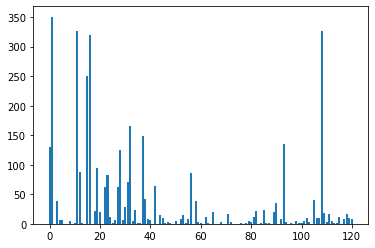

In [78]:
#printing the fs scores 
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [79]:
#finding the 20 best fs scores
k = 20
top_k_indices = (-fs.scores_).argsort()[:k]
for i in top_k_indices:
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 1: 350.654832
Feature 11: 326.057673
Feature 108: 325.706839
Feature 16: 320.063216
Feature 15: 249.634140
Feature 32: 166.038085
Feature 37: 148.088476
Feature 93: 134.316954
Feature 0: 130.110876
Feature 28: 124.121744
Feature 19: 94.053329
Feature 12: 88.217098
Feature 56: 85.997938
Feature 23: 82.579060
Feature 31: 70.515254
Feature 42: 64.562527
Feature 27: 62.453548
Feature 22: 61.721065
Feature 38: 41.742411
Feature 105: 39.725414


In [80]:
colname = X.columns[top_k_indices]
print (colname)

Index(['CODE_GENDER_M', 'NAME_INCOME_TYPE_Pensioner', 'ORGANIZATION_TYPE_XNA',
       'NAME_EDUCATION_TYPE_Higher education', 'NAME_INCOME_TYPE_Working',
       'OCCUPATION_TYPE_Drivers', 'OCCUPATION_TYPE_Low-skill Laborers',
       'ORGANIZATION_TYPE_Self-employed', 'NAME_CONTRACT_TYPE_Revolving loans',
       'NAME_HOUSING_TYPE_With parents',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_INCOME_TYPE_State servant',
       'ORGANIZATION_TYPE_Business Entity Type 3', 'NAME_FAMILY_STATUS_Widow',
       'OCCUPATION_TYPE_Core staff', 'OCCUPATION_TYPE_Sales staff',
       'NAME_HOUSING_TYPE_Rented apartment',
       'NAME_FAMILY_STATUS_Single / not married', 'OCCUPATION_TYPE_Managers',
       'ORGANIZATION_TYPE_Transport: type 3'],
      dtype='object')


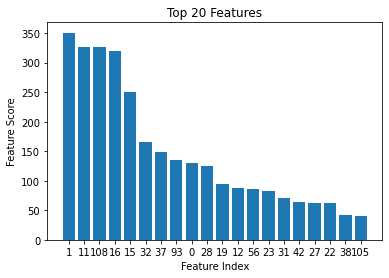

In [81]:
plt.bar(range(k), fs.scores_[top_k_indices])
plt.xticks(range(k), top_k_indices)
plt.xlabel('Feature Index')
plt.ylabel('Feature Score')
plt.title('Top 20 Features')
plt.show()

In [82]:
df= pd.DataFrame({"Feature Index":top_k_indices, "Feature Name":colname})
df

Feature Index                                       Feature Name
0               1                                      CODE_GENDER_M
1              11                         NAME_INCOME_TYPE_Pensioner
2             108                              ORGANIZATION_TYPE_XNA
3              16               NAME_EDUCATION_TYPE_Higher education
4              15                           NAME_INCOME_TYPE_Working
5              32                            OCCUPATION_TYPE_Drivers
6              37                 OCCUPATION_TYPE_Low-skill Laborers
7              93                    ORGANIZATION_TYPE_Self-employed
8               0                 NAME_CONTRACT_TYPE_Revolving loans
9              28                     NAME_HOUSING_TYPE_With parents
10             19  NAME_EDUCATION_TYPE_Secondary / secondary special
11             12                     NAME_INCOME_TYPE_State servant
12             56           ORGANIZATION_TYPE_Business Entity Type 3
13             23                           NAME_FAMILY_STATUS_Widow
14             31                         OCCUPATION_TYPE_Core staff
15             42                        OCCUPATION_TYPE_Sales staff
16             27                 NAME_HOUSING_TYPE_Rented apartment
17             22            NAME_FAMILY_STATUS_Single / not married
18             38                           OCCUPATION_TYPE_Managers
19            105                ORGANIZATION_TYPE_Transport: type 3

In [83]:
#reforming the dataframe
subset_X = X[colname]
categorical_final = pd.concat([subset_X, y], axis=1)
categorical_final = pd.concat([categorical_final, fourth_main_merge['SK_ID_CURR']], axis=1)
categorical_final.head()

CODE_GENDER_M  NAME_INCOME_TYPE_Pensioner  ORGANIZATION_TYPE_XNA  \
0              1                           0                      0   
1              0                           0                      0   
2              1                           0                      0   
3              1                           0                      0   
4              1                           0                      0   

   NAME_EDUCATION_TYPE_Higher education  NAME_INCOME_TYPE_Working  \
0                                     0                         1   
1                                     1                         0   
2                                     0                         1   
3                                     0                         1   
4                                     0                         0   

   OCCUPATION_TYPE_Drivers  OCCUPATION_TYPE_Low-skill Laborers  \
0                        0                                   0   
1                        0                                   0   
2                        0                                   0   
3                        0                                   0   
4                        0                                   0   

   ORGANIZATION_TYPE_Self-employed  NAME_CONTRACT_TYPE_Revolving loans  \
0                                0                                   0   
1                                0                                   0   
2                                0                                   1   
3                                0                                   0   
4                                0                                   0   

   NAME_HOUSING_TYPE_With parents  ...  \
0                               0  ...   
1                               0  ...   
2                               0  ...   
3                               0  ...   
4                               0  ...   

   ORGANIZATION_TYPE_Business Entity Type 3  NAME_FAMILY_STATUS_Widow  \
0                                         1                         0   
1                                         0                         0   
2                                         0                         0   
3                                         0                         0   
4                                         0                         0   

   OCCUPATION_TYPE_Core staff  OCCUPATION_TYPE_Sales staff  \
0                           0                            0   
1                           1                            0   
2                           0                            0   
3                           1                            0   
4                           0                            0   

   NAME_HOUSING_TYPE_Rented apartment  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   NAME_FAMILY_STATUS_Single / not married  OCCUPATION_TYPE_Managers  \
0                                        1                         0   
1                                        0                         0   
2                                        1                         0   
3                                        1                         0   
4                                        0                         0   

   ORGANIZATION_TYPE_Transport: type 3  TARGET  SK_ID_CURR  
0                                    0       1      100002  
1                                    0       0      100003  
2                                    0       0      100004  
3                                    0       0      100007  
4                                    0       0      100008  

[5 rows x 22 columns]

In [84]:
categorical_final.shape

(247032, 22)

# Continuous variables: Feature Selection by HeatMap and PCA

In [85]:
# Selecting continuous variables
continuous_columns = list(fourth_main_merge.select_dtypes(include=['float64', 'int64']).columns)
continuous_dataset = fourth_main_merge[continuous_columns]
continuous_dataset.head()

SK_ID_CURR  day_to_actual_payment_count  max_days_of_delay  \
0      100002                           19               31.0   
1      100003                           25               14.0   
2      100004                            3               11.0   
3      100007                           41               31.0   
4      100008                           34               28.0   

   nummber_of_applications  Consumer loans  Cash loans  Revolving loans  XNA  \
0                        1             1.0         0.0              0.0  0.0   
1                        3             2.0         1.0              0.0  0.0   
2                        1             1.0         0.0              0.0  0.0   
3                        6             2.0         4.0              0.0  0.0   
4                        5             3.0         2.0              0.0  0.0   

   Approved  Refused  ...  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0       1.0      0.0  ...                 0                 0   
1       3.0      0.0  ...                 0                 0   
2       1.0      0.0  ...                 0                 0   
3       6.0      0.0  ...                 0                 0   
4       4.0      0.0  ...                 0                 0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0                        0.0                         1.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        1.0                         1.0   

   percentage_of_credit_to_income  percentage_of_annuity_to_income  
0                      200.788889                        12.197778  
1                      479.075000                        13.221667  
2                      200.000000                        10.000000  
3                      422.222222                        17.996296  
4                      495.450000                        27.795455  

[5 rows x 129 columns]

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
# Columns to exclude from scaling
exclude_cols = ['SK_ID_CURR', 'TARGET']

# Perform MinMax scaling on all columns except the excluded ones
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(continuous_dataset.drop(exclude_cols, axis=1))

# Create a new dataframe with scaled values
scaled_continuous_dataset = pd.DataFrame(scaled_data, columns=continuous_dataset.drop(exclude_cols, axis=1).columns)

# Add the excluded columns back to the scaled dataframe
for col in exclude_cols:
    scaled_continuous_dataset[col] = continuous_dataset[col]

# Display the scaled dataframe
scaled_continuous_dataset.head()

day_to_actual_payment_count  max_days_of_delay  nummber_of_applications  \
0                     0.077551           0.017424                 0.000000   
1                     0.102041           0.012134                 0.027778   
2                     0.012245           0.011201                 0.000000   
3                     0.167347           0.017424                 0.069444   
4                     0.138776           0.016490                 0.055556   

   Consumer loans  Cash loans  Revolving loans  XNA  Approved  Refused  \
0        0.022222    0.000000              0.0  0.0  0.037037      0.0   
1        0.044444    0.016667              0.0  0.0  0.111111      0.0   
2        0.022222    0.000000              0.0  0.0  0.037037      0.0   
3        0.044444    0.066667              0.0  0.0  0.222222      0.0   
4        0.066667    0.033333              0.0  0.0  0.148148      0.0   

   Canceled  ...  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0  0.000000  ...                         0.0                        0.0   
1  0.000000  ...                         0.0                        0.0   
2  0.000000  ...                         0.0                        0.0   
3  0.000000  ...                         0.0                        0.0   
4  0.017241  ...                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0                   0.000000                        0.04   
1                   0.000000                        0.00   
2                   0.000000                        0.00   
3                   0.000000                        0.00   
4                   0.003831                        0.04   

   percentage_of_credit_to_income  percentage_of_annuity_to_income  \
0                        0.040695                         0.077532   
1                        0.097231                         0.084052   
2                        0.040534                         0.063536   
3                        0.085681                         0.114456   
4                        0.100558                         0.176856   

   SK_ID_CURR  TARGET  
0      100002       1  
1      100003       0  
2      100004       0  
3      100007       0  
4      100008       0  

[5 rows x 129 columns]

In [87]:
#export dataset 1 before feature selection
dataset_categorical_original = pd.concat([encoding, fourth_main_merge['SK_ID_CURR']], axis=1)
dataset_1_original = pd.merge(scaled_continuous_dataset,dataset_categorical_original.drop(["TARGET"], axis=1), on="SK_ID_CURR")
dataset_1_original.head()

day_to_actual_payment_count  max_days_of_delay  nummber_of_applications  \
0                     0.077551           0.017424                 0.000000   
1                     0.102041           0.012134                 0.027778   
2                     0.012245           0.011201                 0.000000   
3                     0.167347           0.017424                 0.069444   
4                     0.138776           0.016490                 0.055556   

   Consumer loans  Cash loans  Revolving loans  XNA  Approved  Refused  \
0        0.022222    0.000000              0.0  0.0  0.037037      0.0   
1        0.044444    0.016667              0.0  0.0  0.111111      0.0   
2        0.022222    0.000000              0.0  0.0  0.037037      0.0   
3        0.044444    0.066667              0.0  0.0  0.222222      0.0   
4        0.066667    0.033333              0.0  0.0  0.148148      0.0   

   Canceled  ...  FONDKAPREMONT_MODE_reg oper spec account  \
0  0.000000  ...                                         0   
1  0.000000  ...                                         0   
2  0.000000  ...                                         0   
3  0.000000  ...                                         0   
4  0.017241  ...                                         0   

   HOUSETYPE_MODE_specific housing  HOUSETYPE_MODE_terraced house  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   WALLSMATERIAL_MODE_Mixed  WALLSMATERIAL_MODE_Monolithic  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         0                              0   
4                         0                              0   

   WALLSMATERIAL_MODE_Others  WALLSMATERIAL_MODE_Panel  \
0                          0                         0   
1                          0                         0   
2                          0                         1   
3                          0                         1   
4                          0                         1   

   WALLSMATERIAL_MODE_Stone, brick  WALLSMATERIAL_MODE_Wooden  \
0                                1                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   

   EMERGENCYSTATE_MODE_Yes  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 250 columns]

In [88]:
dataset_1_original.to_csv('dataset_1_original.csv', index=False)

In [89]:
dataset_corr=scaled_continuous_dataset.drop("SK_ID_CURR", axis=1)
dataset_corr.head()

day_to_actual_payment_count  max_days_of_delay  nummber_of_applications  \
0                     0.077551           0.017424                 0.000000   
1                     0.102041           0.012134                 0.027778   
2                     0.012245           0.011201                 0.000000   
3                     0.167347           0.017424                 0.069444   
4                     0.138776           0.016490                 0.055556   

   Consumer loans  Cash loans  Revolving loans  XNA  Approved  Refused  \
0        0.022222    0.000000              0.0  0.0  0.037037      0.0   
1        0.044444    0.016667              0.0  0.0  0.111111      0.0   
2        0.022222    0.000000              0.0  0.0  0.037037      0.0   
3        0.044444    0.066667              0.0  0.0  0.222222      0.0   
4        0.066667    0.033333              0.0  0.0  0.148148      0.0   

   Canceled  ...  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
0  0.000000  ...               0.0                         0.0   
1  0.000000  ...               0.0                         0.0   
2  0.000000  ...               0.0                         0.0   
3  0.000000  ...               0.0                         0.0   
4  0.017241  ...               0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                   0.000000   
1                        0.0                   0.000000   
2                        0.0                   0.000000   
3                        0.0                   0.000000   
4                        0.0                   0.003831   

   AMT_REQ_CREDIT_BUREAU_YEAR  percentage_of_credit_to_income  \
0                        0.04                        0.040695   
1                        0.00                        0.097231   
2                        0.00                        0.040534   
3                        0.00                        0.085681   
4                        0.04                        0.100558   

   percentage_of_annuity_to_income  TARGET  
0                         0.077532       1  
1                         0.084052       0  
2                         0.063536       0  
3                         0.114456       0  
4                         0.176856       0  

[5 rows x 128 columns]

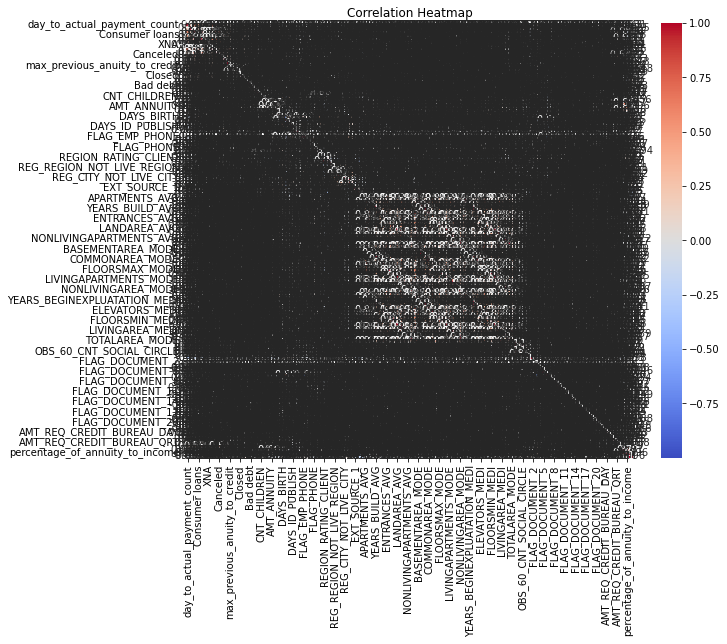

In [90]:
correlation_matrix = dataset_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [91]:
correlation_target = abs(correlation_matrix["TARGET"])
pearson_features = correlation_target[correlation_target>=0.04]
pearson_features

Revolving loans                0.048083
Refused                        0.065448
Active                         0.065601
DAYS_BIRTH                     0.079606
DAYS_EMPLOYED                  0.045417
DAYS_REGISTRATION              0.042569
DAYS_ID_PUBLISH                0.049793
FLAG_EMP_PHONE                 0.046473
REGION_RATING_CLIENT           0.054845
REGION_RATING_CLIENT_W_CITY    0.057052
REG_CITY_NOT_LIVE_CITY         0.043528
REG_CITY_NOT_WORK_CITY         0.049702
EXT_SOURCE_1                   0.100540
EXT_SOURCE_2                   0.152622
EXT_SOURCE_3                   0.172069
DAYS_LAST_PHONE_CHANGE         0.055125
FLAG_DOCUMENT_3                0.042525
TARGET                         1.000000
Name: TARGET, dtype: float64

In [92]:
dataset_with_good_features = scaled_continuous_dataset[pearson_features.index]
dataset_with_good_features.loc[:, "SK_ID_CURR"] = scaled_continuous_dataset["SK_ID_CURR"]
dataset_with_good_features.head()

C:\Users\Meetings\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Revolving loans  Refused   Active  DAYS_BIRTH  DAYS_EMPLOYED  \
0              0.0      0.0  0.06250    0.888663       0.045086   
1              0.0      0.0  0.03125    0.476287       0.043648   
2              0.0      0.0  0.00000    0.347505       0.046161   
3              0.0      0.0  0.00000    0.297482       0.038820   
4              0.0      0.0  0.03125    0.466350       0.042604   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_EMP_PHONE  REGION_RATING_CLIENT  \
0           0.852140         0.705433             1.0                   0.5   
1           0.951929         0.959566             1.0                   0.0   
2           0.827335         0.648326             1.0                   0.5   
3           0.825268         0.519522             1.0                   0.5   
4           0.798557         0.933722             1.0                   0.5   

   REGION_RATING_CLIENT_W_CITY  REG_CITY_NOT_LIVE_CITY  \
0                          0.5                     0.0   
1                          0.0                     0.0   
2                          0.5                     0.0   
3                          0.5                     0.0   
4                          0.5                     0.0   

   REG_CITY_NOT_WORK_CITY  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0                     0.0      0.072215      0.307541      0.155054   
1                     0.0      0.312933      0.727773      0.569889   
2                     0.0      0.514238      0.650189      0.814130   
3                     1.0      0.514238      0.377471      0.569889   
4                     0.0      0.514238      0.414297      0.693145   

   DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  TARGET  SK_ID_CURR  
0                0.728253              1.0       1      100002  
1                0.801582              1.0       0      100003  
2                0.804697              0.0       0      100004  
3                0.734963              0.0       0      100007  
4                0.392284              1.0       0      100008

In [93]:
total_missing = dataset_with_good_features.isnull().sum().sum()

# Calculate the total number of values
total_values = dataset_with_good_features.size

# Calculate the percentage of missing values
percentage_missing = (total_missing / total_values) * 100

print(f"The percentage of missing values in the dataset is: {percentage_missing:.2f}%")

The percentage of missing values in the dataset is: 0.00%


In [95]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=2)

# Transform the entire dataset
dataset_with_good_features_PCA_2= dataset_with_good_features.drop(["TARGET", "SK_ID_CURR"], axis=1)
dataset_with_good_features_PCA_2= ipca.fit_transform(dataset_with_good_features_PCA_2)
pca_df= pd.DataFrame(dataset_with_good_features_PCA_2, columns=["PC1", "PC2"])

In [96]:
pca_df.head()

PC1       PC2
0  0.376512  0.306146
1  0.263826  0.325873
2 -0.176932 -0.337795
3  0.150536 -0.973311
4  0.232242  0.379735

In [97]:
# Perform MinMax scaling on PCA
scaler = MinMaxScaler()
scaled_PCA = scaler.fit_transform(pca_df)
scaled_PCA= pd.DataFrame(scaled_PCA, columns=["PC1", "PC2"])
scaled_PCA.head()

PC1       PC2
0  0.791833  0.912558
1  0.743567  0.923457
2  0.554783  0.556805
3  0.695043  0.205705
4  0.730039  0.953214

In [98]:
scaled_PCA.shape

(247032, 2)

In [99]:
continuous_dataset = pd.concat([scaled_PCA, scaled_continuous_dataset], axis=1)
continuous_dataset.head()

PC1       PC2  day_to_actual_payment_count  max_days_of_delay  \
0  0.791833  0.912558                     0.077551           0.017424   
1  0.743567  0.923457                     0.102041           0.012134   
2  0.554783  0.556805                     0.012245           0.011201   
3  0.695043  0.205705                     0.167347           0.017424   
4  0.730039  0.953214                     0.138776           0.016490   

   nummber_of_applications  Consumer loans  Cash loans  Revolving loans  XNA  \
0                 0.000000        0.022222    0.000000              0.0  0.0   
1                 0.027778        0.044444    0.016667              0.0  0.0   
2                 0.000000        0.022222    0.000000              0.0  0.0   
3                 0.069444        0.044444    0.066667              0.0  0.0   
4                 0.055556        0.066667    0.033333              0.0  0.0   

   Approved  ...  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0  0.037037  ...                         0.0                        0.0   
1  0.111111  ...                         0.0                        0.0   
2  0.037037  ...                         0.0                        0.0   
3  0.222222  ...                         0.0                        0.0   
4  0.148148  ...                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0                   0.000000                        0.04   
1                   0.000000                        0.00   
2                   0.000000                        0.00   
3                   0.000000                        0.00   
4                   0.003831                        0.04   

   percentage_of_credit_to_income  percentage_of_annuity_to_income  \
0                        0.040695                         0.077532   
1                        0.097231                         0.084052   
2                        0.040534                         0.063536   
3                        0.085681                         0.114456   
4                        0.100558                         0.176856   

   SK_ID_CURR  TARGET  
0      100002       1  
1      100003       0  
2      100004       0  
3      100007       0  
4      100008       0  

[5 rows x 131 columns]

In [100]:
continuous_dataset.shape

(247032, 131)

In [101]:
categorical_final['SK_ID_CURR'] = categorical_final['SK_ID_CURR'].astype(int).round(0)
categorical_final.head()

CODE_GENDER_M  NAME_INCOME_TYPE_Pensioner  ORGANIZATION_TYPE_XNA  \
0              1                           0                      0   
1              0                           0                      0   
2              1                           0                      0   
3              1                           0                      0   
4              1                           0                      0   

   NAME_EDUCATION_TYPE_Higher education  NAME_INCOME_TYPE_Working  \
0                                     0                         1   
1                                     1                         0   
2                                     0                         1   
3                                     0                         1   
4                                     0                         0   

   OCCUPATION_TYPE_Drivers  OCCUPATION_TYPE_Low-skill Laborers  \
0                        0                                   0   
1                        0                                   0   
2                        0                                   0   
3                        0                                   0   
4                        0                                   0   

   ORGANIZATION_TYPE_Self-employed  NAME_CONTRACT_TYPE_Revolving loans  \
0                                0                                   0   
1                                0                                   0   
2                                0                                   1   
3                                0                                   0   
4                                0                                   0   

   NAME_HOUSING_TYPE_With parents  ...  \
0                               0  ...   
1                               0  ...   
2                               0  ...   
3                               0  ...   
4                               0  ...   

   ORGANIZATION_TYPE_Business Entity Type 3  NAME_FAMILY_STATUS_Widow  \
0                                         1                         0   
1                                         0                         0   
2                                         0                         0   
3                                         0                         0   
4                                         0                         0   

   OCCUPATION_TYPE_Core staff  OCCUPATION_TYPE_Sales staff  \
0                           0                            0   
1                           1                            0   
2                           0                            0   
3                           1                            0   
4                           0                            0   

   NAME_HOUSING_TYPE_Rented apartment  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   NAME_FAMILY_STATUS_Single / not married  OCCUPATION_TYPE_Managers  \
0                                        1                         0   
1                                        0                         0   
2                                        1                         0   
3                                        1                         0   
4                                        0                         0   

   ORGANIZATION_TYPE_Transport: type 3  TARGET  SK_ID_CURR  
0                                    0       1      100002  
1                                    0       0      100003  
2                                    0       0      100004  
3                                    0       0      100007  
4                                    0       0      100008  

[5 rows x 22 columns]

In [102]:
dataset_1_feature_selection = pd.merge(continuous_dataset, categorical_final.drop(["TARGET"],axis=1), on="SK_ID_CURR")
dataset_1_feature_selection.fillna(0, inplace=True)
dataset_1_feature_selection.head()

PC1       PC2  day_to_actual_payment_count  max_days_of_delay  \
0  0.791833  0.912558                     0.077551           0.017424   
1  0.743567  0.923457                     0.102041           0.012134   
2  0.554783  0.556805                     0.012245           0.011201   
3  0.695043  0.205705                     0.167347           0.017424   
4  0.730039  0.953214                     0.138776           0.016490   

   nummber_of_applications  Consumer loans  Cash loans  Revolving loans  XNA  \
0                 0.000000        0.022222    0.000000              0.0  0.0   
1                 0.027778        0.044444    0.016667              0.0  0.0   
2                 0.000000        0.022222    0.000000              0.0  0.0   
3                 0.069444        0.044444    0.066667              0.0  0.0   
4                 0.055556        0.066667    0.033333              0.0  0.0   

   Approved  ...  NAME_EDUCATION_TYPE_Secondary / secondary special  \
0  0.037037  ...                                                  1   
1  0.111111  ...                                                  0   
2  0.037037  ...                                                  1   
3  0.222222  ...                                                  1   
4  0.148148  ...                                                  1   

   NAME_INCOME_TYPE_State servant  ORGANIZATION_TYPE_Business Entity Type 3  \
0                               0                                         1   
1                               1                                         0   
2                               0                                         0   
3                               0                                         0   
4                               1                                         0   

   NAME_FAMILY_STATUS_Widow  OCCUPATION_TYPE_Core staff  \
0                         0                           0   
1                         0                           1   
2                         0                           0   
3                         0                           1   
4                         0                           0   

   OCCUPATION_TYPE_Sales staff  NAME_HOUSING_TYPE_Rented apartment  \
0                            0                                   0   
1                            0                                   0   
2                            0                                   0   
3                            0                                   0   
4                            0                                   0   

   NAME_FAMILY_STATUS_Single / not married  OCCUPATION_TYPE_Managers  \
0                                        1                         0   
1                                        0                         0   
2                                        1                         0   
3                                        1                         0   
4                                        0                         0   

   ORGANIZATION_TYPE_Transport: type 3  
0                                    0  
1                                    0  
2                                    0  
3                                    0  
4                                    0  

[5 rows x 151 columns]

In [103]:
dataset_1_feature_selection.shape

(247032, 151)

In [104]:
dataset_1_feature_selection.to_csv('dataset_1_feature_selection.csv', index=False)

C:\Users\Meetings\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TARGET', ylabel='count'>

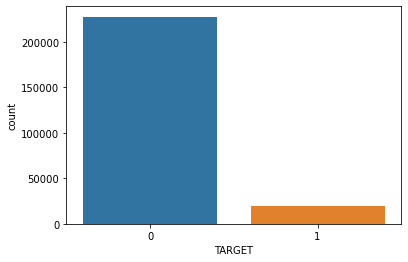

In [105]:
sns.countplot(dataset_1_feature_selection["TARGET"])

In [106]:
from sklearn.datasets import make_classification
import imblearn.over_sampling
from imblearn.over_sampling import SMOTE

In [107]:
X=dataset_1_feature_selection.drop("TARGET", axis=1)
y=dataset_1_feature_selection["TARGET"]

In [108]:
#oversampling
over_sampling= SMOTE(sampling_strategy='minority', random_state=42, k_neighbors=2)
X_oversampled, y_oversampled = over_sampling.fit_resample(X,y)

C:\Users\Meetings\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TARGET', ylabel='count'>

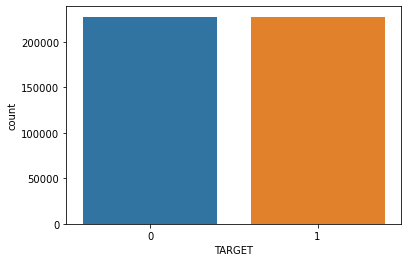

In [109]:
sns.countplot(y_oversampled)

In [111]:
dataset_1_feature_selection_oversampled = pd.concat([X_oversampled, y_oversampled], axis=1)
dataset_1_feature_selection_oversampled.head()

PC1       PC2  day_to_actual_payment_count  max_days_of_delay  \
0  0.791833  0.912558                     0.077551           0.017424   
1  0.743567  0.923457                     0.102041           0.012134   
2  0.554783  0.556805                     0.012245           0.011201   
3  0.695043  0.205705                     0.167347           0.017424   
4  0.730039  0.953214                     0.138776           0.016490   

   nummber_of_applications  Consumer loans  Cash loans  Revolving loans  XNA  \
0                 0.000000        0.022222    0.000000              0.0  0.0   
1                 0.027778        0.044444    0.016667              0.0  0.0   
2                 0.000000        0.022222    0.000000              0.0  0.0   
3                 0.069444        0.044444    0.066667              0.0  0.0   
4                 0.055556        0.066667    0.033333              0.0  0.0   

   Approved  ...  NAME_INCOME_TYPE_State servant  \
0  0.037037  ...                               0   
1  0.111111  ...                               1   
2  0.037037  ...                               0   
3  0.222222  ...                               0   
4  0.148148  ...                               1   

   ORGANIZATION_TYPE_Business Entity Type 3  NAME_FAMILY_STATUS_Widow  \
0                                         1                         0   
1                                         0                         0   
2                                         0                         0   
3                                         0                         0   
4                                         0                         0   

   OCCUPATION_TYPE_Core staff  OCCUPATION_TYPE_Sales staff  \
0                           0                            0   
1                           1                            0   
2                           0                            0   
3                           1                            0   
4                           0                            0   

   NAME_HOUSING_TYPE_Rented apartment  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   NAME_FAMILY_STATUS_Single / not married  OCCUPATION_TYPE_Managers  \
0                                        1                         0   
1                                        0                         0   
2                                        1                         0   
3                                        1                         0   
4                                        0                         0   

   ORGANIZATION_TYPE_Transport: type 3  TARGET  
0                                    0       1  
1                                    0       0  
2                                    0       0  
3                                    0       0  
4                                    0       0  

[5 rows x 151 columns]

In [113]:
dataset_1_feature_selection_oversampled.shape

(455496, 151)

In [114]:
dataset_1_feature_selection_oversampled.to_csv('dataset_1_feature_selection_oversampled.csv', index=False)

In [115]:
import imblearn.under_sampling
from imblearn.under_sampling import NearMiss

In [116]:
#undersampling
under_sampling= NearMiss(sampling_strategy='majority', n_neighbors=5, n_neighbors_ver3=3)
X_undersampled, y_undersampled = under_sampling.fit_resample(X,y)

C:\Users\Meetings\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TARGET', ylabel='count'>

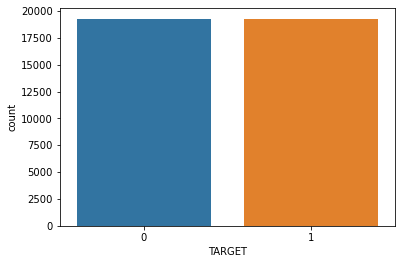

In [117]:
sns.countplot(y_undersampled)

In [118]:
dataset_1_feature_selection_undersampled = pd.concat([X_undersampled, y_undersampled], axis=1)
dataset_1_feature_selection_undersampled.head()

PC1       PC2  day_to_actual_payment_count  max_days_of_delay  \
0  0.695466  0.947625                     0.224490           0.033603   
1  0.195790  0.952081                     0.693878           0.018357   
2  0.750309  0.927253                     0.200000           0.020535   
3  0.737797  0.945232                     0.102041           0.027380   
4  0.220013  0.927715                     0.048980           0.017424   

   nummber_of_applications  Consumer loans  Cash loans  Revolving loans  XNA  \
0                 0.097222        0.133333    0.016667         0.032258  0.0   
1                 0.083333        0.088889    0.050000         0.000000  0.0   
2                 0.041667        0.066667    0.016667         0.000000  0.0   
3                 0.055556        0.088889    0.000000         0.032258  0.0   
4                 0.027778        0.044444    0.000000         0.032258  0.0   

   Approved  ...  NAME_INCOME_TYPE_State servant  \
0  0.296296  ...                               0   
1  0.222222  ...                               0   
2  0.111111  ...                               0   
3  0.185185  ...                               0   
4  0.111111  ...                               0   

   ORGANIZATION_TYPE_Business Entity Type 3  NAME_FAMILY_STATUS_Widow  \
0                                         0                         0   
1                                         0                         0   
2                                         0                         0   
3                                         0                         0   
4                                         0                         0   

   OCCUPATION_TYPE_Core staff  OCCUPATION_TYPE_Sales staff  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   NAME_HOUSING_TYPE_Rented apartment  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   NAME_FAMILY_STATUS_Single / not married  OCCUPATION_TYPE_Managers  \
0                                        0                         0   
1                                        0                         0   
2                                        0                         0   
3                                        0                         0   
4                                        0                         0   

   ORGANIZATION_TYPE_Transport: type 3  TARGET  
0                                    0       0  
1                                    0       0  
2                                    0       0  
3                                    0       0  
4                                    0       0  

[5 rows x 151 columns]

In [120]:
dataset_1_feature_selection_undersampled.shape

(38568, 151)

In [119]:
dataset_1_feature_selection_undersampled.to_csv('dataset_1_feature_selection_undersampled.csv', index=False)